![dvd_image](assets/dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In this project, you will use regression models to predict the number of days a customer rents DVDs for.

As with most data science projects, you will need to pre-process the data provided, in this case, a csv file called `rental_info.csv`. Specifically, you need to:

- Read in the csv file `rental_info.csv` using `pandas`.
- Create a column named `"rental_length_days"` using the columns `"return_date"` and `"rental_date"`, and add it to the `pandas` DataFrame. This column should contain information on how many days a DVD has been rented by a customer.
- Create two columns of dummy variables from `"special_features"`, which takes the value of `1` when:
    - The value is `"Deleted Scenes"`, storing as a column called `"deleted_scenes"`.
    - The value is `"Behind the Scenes"`, storing as a column called `"behind_the_scenes"`.
- Make a pandas DataFrame called X containing all the appropriate features you can use to run the regression models, avoiding columns that leak data about the target.
- Choose the `"rental_length_days"` as the target column and save it as a pandas Series called `y`.

Following the preprocessing you will need to:

- Split the data into `X_train`, `y_train`, `X_test`, and `y_test` train and test sets, avoiding any features that leak data about the target variable, and include 20% of the total data in the test set.
- **Set `random_state` to `9`** whenever you use a function/method involving randomness, for example, when doing a test-train split.

**Recommend a model yielding a mean squared error (MSE) less than 3 on the test set**

- Save the model you would recommend as a variable named `best_model`, and save its MSE on the test set as `best_mse`.

## Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Since we have to implement a regression model, we will test two different models: OLS and Random Forest. We will select the one that provide the best performance (lower MSE).

In [2]:
# For lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Run OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

First, we load the dataset.

In [3]:
# Load dataset
df_rental = pd.read_csv("data/rental_info.csv")
df_rental.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [4]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


## Pre-processing

As we can see, we need to do some pre-process before implementing the model.
1. Add information on rental duration. Since this is the parameter we want to predict, we need to get this information from the dataset to train the model with the information we have. This information can be obtained from the columns `rental_date` and `return_date`.
2. Create dummy variables from `"special_features"`. This column is a categorical data, so we need to tranform this information into numerical data using dummy variables. There are two possibilities: `Deleted Scenes` and `Behind Scenes`, so we will need to create two columns of dummy variables.

In [5]:
# Add information on rental duration
df_rental["rental_length"] = pd.to_datetime(df_rental["return_date"]) - pd.to_datetime(df_rental["rental_date"])

# To get the number of days we use the attribute dt.days
df_rental["rental_length_days"] = df_rental["rental_length"].dt.days

# Check new column
df_rental.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4


In [6]:
# Add dummy variables
# Add dummy for deleted scenes
df_rental["deleted_scenes"] =  np.where(df_rental["special_features"].str.contains("Deleted Scenes"), 1, 0)
# Add dummy for behind the scenes
df_rental["behind_the_scenes"] =  np.where(df_rental["special_features"].str.contains("Behind the Scenes"), 1, 0)

# Check dummy variables
df_rental.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days,deleted_scenes,behind_the_scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3,0,1
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2,0,1
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7,0,1
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2,0,1
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4,0,1


Now we can select the target, and create a DataFrame containing the features that we will use for the model. For that, we have to select the correct columns from `df_rental`.

In [7]:
# Choose columns to drop
cols_to_drop = ["special_features", "rental_length", "rental_date", "return_date"]
df_rental.drop(cols_to_drop, axis=1, inplace=True)

# Split into feature and target sets
X = df_rental.drop("rental_length_days", axis=1)
y = df_rental["rental_length_days"]

Now, with the features dataframe and the target, we can split the data into training and test set.

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

## OLS - Ordinary Least Squares regression model

First we will use a **Lasso Regression**. The goal with this method is for feature selection. Here's is why Lasso Regression is a suitable choice:

1. **Feature Selection**: Lasso regression performs automatic feature selection by penalizing the absolute size of the regression coefficients. This leads to some coefficients being exactly zero, effectively removing the corresponding features from the model. Thus, _Lasso can help identify and select the most important features while discarding less relevant ones, which can improve model interpretability and reduce overfitting_.
2. **Regularization**: _Lasso regression includes a regularization term in its objective function, which helps to prevent overfitting by penalizing large coefficients_. This is particularly useful when dealing with datasets with a large number of features or when the number of features exceeds the number of observations. By controlling the strength of regularization through the alpha parameter, Lasso regression allows for a balance between bias and variance, potentially leading to better generalization performance.
    - In our case, we set the regularization parameter `alpha` to `0.3`, which controls the strength of regularization. Higher values of alpha lead to more regularization, causing more coefficients to be close to zero.
3. **Dealing with Multicollinearity**: Lasso regression can handle multicollinearity (high correlation between predictor variables) by shrinking the coefficients of correlated features towards zero. This can be advantageous in datasets where predictor variables are highly correlated, as it helps to stabilize the coefficient estimates and make them more interpretable.
4. **Simplicity and Efficiency**: Lasso regression is computationally efficient and relatively simple to implement. It provides a straightforward way to perform feature selection and regularization without the need for additional feature engineering or complex model tuning.

In summary, Lasso regression is chosen in this case for its ability to perform feature selection, regularization, and handling multicollinearity, all of which can contribute to improved model performance and interpretability.

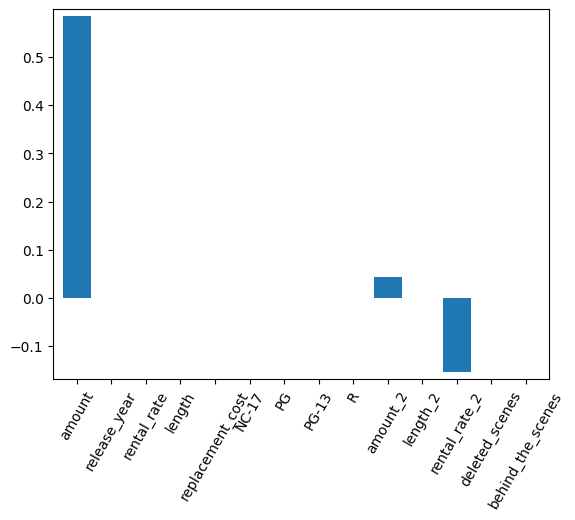

In [9]:
# Create the Lasso model
lasso = Lasso(alpha=0.3, random_state=9) 

# Train the model and access the coefficients
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

plt.bar(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [10]:
list_lasso_coef = list(zip(X.columns, lasso_coef))
pd.DataFrame(list_lasso_coef)

,0,1
0,amount,0.584104
1,release_year,0.000000
2,rental_rate,-0.000000
3,length,0.000000
4,replacement_cost,-0.000000
5,NC-17,0.000000
6,PG,0.000000
7,PG-13,0.000000
8,R,-0.000000
9,amount_2,0.043622


We can clearly identify the important features.

In [11]:
# Perform feature selection by choosing columns with positive coefficients, indicating that these features are considered important or relevant by the Lasso model.
X_lasso_train, X_lasso_test = X_train.iloc[:, lasso_coef > 0], X_test.iloc[:, lasso_coef > 0]

X_lasso_train.head()

,amount,amount_2,length_2
6682,2.99,8.9401,8100.0
8908,4.99,24.9001,2809.0
11827,6.99,48.8601,29241.0
6153,2.99,8.9401,5329.0
10713,5.99,35.8801,14884.0


Once we have selected the most important features, we can implement the model.

An **Ordinary Least Squares regression model (OLS)**, often referred to simply as OLS, is a _linear regression model that seeks to minimize the sum of the squared differences between the observed and predicted values of the dependent variable_. 

The objective of OLS is to find the line (or hyperplane in higher dimensions) that best fits the data by minimizing the sum of the squared differences between the observed values (the actual target values) and the predicted values (values predicted by the model).

OLS regression is widely used in statistical modeling and machine learning for its simplicity, interpretability, and ease of implementation. It forms the basis for many regression techniques and is often used as a benchmark model for comparison with more complex models.

In [12]:
# Run OLS models on lasso chosen regression
ols = LinearRegression()
ols = ols.fit(X_lasso_train, y_train)
y_test_pred = ols.predict(X_lasso_test)

# Calculate MSE
mse_lin_reg_lasso = mean_squared_error(y_test, y_test_pred)
print(mse_lin_reg_lasso)

4.812297241276236


As we can see, the MSE is more than the desired threshold.

## Random Forest

Now, we are going to implement a **Random Forest** model. Random Forests belong to the family of ensemble methods. Instead of relying on a single decision tree, they aggregate predictions from multiple trees to improve overall accuracy. Each tree makes decisions based on a series of questions (features) to arrive at a final prediction.

- They tend to perform well across various domains and datasets, often outperforming single decision trees.
- By combining multiple trees, Random Forests mitigate overfitting, which is a common issue with individual decision trees.
- Random Forests provide insights into feature importance, helping identify relevant variables.
- They capture non-linear relationships in the data effectively.

But before implement this model, we will look for the best hyperparameter values. For this we will use the technique of **Randomized Search**. The goal is to find the best combination of hyperparameters that maximizes model performance (e.g., accuracy, mean squared error). We will select the `n_estimators` and `max_depth` hyperparameters.
- `n_estimators`: Number of Trees. Determines how many decision trees are in the forest. Larger values improve accuracy but increase computation time.
- `max_depth`: Maximum Depth. Limits the depth of individual trees. Helps prevent overfitting.

Steps for `RandomizedSearchCV`:
1. _Hyperparameter Space Definition_.
2. _Random Sampling_. Instead of exhaustively trying all possible combinations (as in grid search), RandomizedSearchCV randomly samples a fixed number of parameter settings from the specified distributions.
3. _Model Training and Cross-Validation_: For each sampled set of hyperparameters a new model (e.g., Random Forest) is instantiated with those hyperparameters. The model is trained on the training data using cross-validation (usually k-fold cross-validation). The performance metric (e.g., accuracy, mean squared error) is computed on the validation set.
4. _Best Parameters Selection_.

In [13]:
# Random forest hyperparameter space
param_dist = {
    'n_estimators': np.arange(1,101,1),
    'max_depth':np.arange(1,11,1)
}

# Create a random forest regressor
rf = RandomForestRegressor()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions=param_dist, 
                                 cv=5, 
                                 random_state=9)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best hyper param
hyper_params = rand_search.best_params_
print(hyper_params)

{'n_estimators': 51, 'max_depth': 10}


Now that we know the best combination of hyperparameters, we can implement the Random Forest model.

In [14]:
# Run the random forest on the chosen hyper parameters
rf = RandomForestRegressor(n_estimators=hyper_params["n_estimators"], 
                           max_depth=hyper_params["max_depth"], 
                           random_state=9)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

# Calculate MSE
mse_random_forest= mean_squared_error(y_test, rf_pred)
print(mse_random_forest)

2.225667528098759


## Select model

In [15]:
# Random forest gives lowest MSE so:
best_model = rf
best_mse = mse_random_forest